# Feature Selection I - Selecting for Feature Information  
In this first out of two chapters on feature selection, you'll learn about the curse of dimensionality and how dimensionality reduction can help you overcome it. You'll be introduced to a number of techniques to detect and remove features that bring little added value to the dataset. Either because they have little variance, too many missing values, or because they are strongly correlated to other features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## The curse of dimensionality  
  
To avoid overfitting, the number of observations should increase exponentially with the number of features. Since this becomes really problematic for high dimensional datasets this phenomenon is known as the curse of dimensionality. The solution to this is of course to apply dimensionality reduction.

### Train - test split
  
In this chapter, you will keep working with the ANSUR dataset. Before you can build a model on your dataset, you should first decide on which feature you want to predict. In this case, you're trying to predict gender.
  
You need to extract the column holding this feature from the dataset and then split the data into a training and test set. The training set will be used to train the model and the test set will be used to check its performance on unseen data.

In [2]:
# Load the data
ansur_male = pd.read_csv('../_datasets/ANSUR_II_MALE.csv')
ansur_female = pd.read_csv('../_datasets/ANSUR_II_FEMALE.csv')

# Concat the 2 datasets
ansur_df = pd.concat([ansur_male, ansur_female])

# Unused columns in the dataset
unused = ['Branch', 'Component', 'BMI_class', 'Height_class', 'BMI', 'weight_kg', 'stature_m']

# Drop the non-numeric columns from df
ansur_df = ansur_df.drop(unused, axis=1)

In [3]:
from sklearn.model_selection import train_test_split


# Select the Gender column as the feature to be predict (y)
y = ansur_df['Gender'].values

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis= 1).values

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

# Display shapes, :>5 means align right by width of 5
print(
    """
    {:>5} Observations in train set
    {:>5} Observations in test set
    {:>5} Features
    """.format(X_train.shape[0], X_test.shape[0], X_test.shape[1])
)



     4247 Observations in train set
     1821 Observations in test set
       91 Features
    


You now have one dataset for model training, and one for model testing.

### Fitting and testing the model
  
In the previous exercise, you split the dataset into X_train, X_test, y_train, and y_test. These datasets have been pre-loaded for you. You'll now create a support vector machine classifier model `SVC()`, and fit that to the training data. You'll then calculate the accuracy on both the test and training set to detect overfitting.

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(
    """
    {0:.1%} Accuracy on training set
    {1:.1%} Accuracy on testing set
    """.format(accuracy_train, accuracy_test)
)



    98.9% Accuracy on training set
    98.9% Accuracy on testing set
    


Looks like the model is fitted properly

### Accuracy after dimensionality reduction
  
You'll reduce the overfit with the help of dimensionality reduction. In this case, you'll apply a rather drastic form of dimensionality reduction by only selecting a single column that has some good information to distinguish between genders. You'll repeat the train-test split, model fit and prediction steps to compare the accuracy on test versus training data.

In [5]:
ansur_df_overfit = pd.read_csv('../_datasets/ansur_overfit.csv')

# Select the Gender column as the feature to be predict (y)
y = ansur_df_overfit['Gender'].values

# Remove the Gender column to create the training data
X = ansur_df_overfit.drop('Gender', axis=1).values

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Display shapes, :>5 means align right by width of 5
print(
    """
    {:>5} Observations in train set
    {:>5} Observations in test set
    {:>5} Features
    """.format(X_train.shape[0], X_test.shape[0], X_test.shape[1])
)

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(
    """
    {0:.1%} Accuracy on training set
    {1:.1%} Accuracy on testing set
    """.format(accuracy_train, accuracy_test)
)


      700 Observations in train set
      300 Observations in test set
       91 Features
    

    94.1% Accuracy on training set
    94.7% Accuracy on testing set
    


Model is overfitting as shown 

In [6]:
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df_overfit[['neckcircumferencebase']].values

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(
    """
    {0:.1%} Accuracy on training set
    {1:.1%} Accuracy on testing set
    """.format(accuracy_train, accuracy_test)
)


    94.4% Accuracy on training set
    94.0% Accuracy on testing set
    


The single feature model outperforms the one trained on all features? This is an example of the curse of dimensionality! The model overfits when we feed it too many features. It overlooks that neck circumference by itself is pretty different for males and females.

## Features with missing values or little variance
  
**Creating a feature selector**
  
`sklearn.feature_selection.VarianceThreshold()`  
`sel = VarianceThreshold(threshold= 1)`  
`sel.fit(df)`  
`mask = sel.get_support()`  
Let's once again use the ANSUR dataset which has 6068 rows and 94 numeric columns as an example. Like we saw in chapter one, low variance features are so similar between different observations that they may contain little information you can use in an analysis. To remove them, we can use one of Scikit-learn's built-in feature selection tools called `VarianceThreshold()`. When we create the selector we can set the minimal variance threshold. Here, we've set it to a variance of one. After fitting the selector to our dataset, its `.get_support()` method will give us a True or False value on whether each feature's variance is above the threshold or not. We call this type of boolean array a mask.
  
**Applying a feature selector**  
  
`reduced_df = df.loc[:, mask]`  
We can use this mask to reduce the number of dimensions in our dataset. We use the DataFrame's `.loc[]` method and specify we want to select all rows using a colon for the first argument and sub-select the columns by using our mask as the second. In this case, our selector has reduced the number of features by just one.  
  
**Variance selector caveats**  
  
![Alt text](variance-selector-caveats.png)  

One problem with variance thresholds is that variance values aren't always easy to interpret or compare between features. We can illustrate this by looking at a number of buttock features from our ANSUR dataset. In the boxplot you can see that these different measurements have different medians, the green horizontal lines in each blue rectangle, and variances, the height of the blue rectangles and the length of the vertical lines coming from them. For this dataset higher values tend to have higher variances and we should therefore normalize the variance before using it for feature selection.  
  
**Normalizing the variance**  
  
`sel = VarianceThreshold(threshold= 0.005)`  
`sel.fit(df/df.mean())`  
To do so we divide each column by its mean value before fitting the selector. After normalization, the variance in the dataset will be lower. We therefore also reduced the variance threshold to 0.005. Make sure to inspect your data visually while setting this value. When we apply the selector to our dataset the number of features is more than halved, to 45.  
  
**Missing value selector**  
  
Another reason you might want to drop a feature is that it contains a lot of missing values. These missing values show up in our pandas DataFrame of the Pokemon dataset as NaN.  
  
**Identifying missing values**  
  
`df.isna()`  
With the `.isna()` method we can identify them with a boolean value.  
  
**Counting missing values**  
  
`df.isna().sum()/len(df)`  
Boolean values can be summed since a True value resembles a one and False a zero, so if we chain the `.sum()` method to `.isna()` we get the total number of missing values in each column. If we then divide this number by the total number of rows in the DataFrame we get a ratio of missing values between zero and one. In this example it turns out that almost half the Pokemon don't have a value for the Type 2 feature.  
  
**Applying a missing value threshold**  
  
`mask = df.isna().sum() / len(df) < 0.3`  
`reduced_df = df.loc[:, mask]`  
Based on this ratio we can create a mask for features that have fewer missing values than a certain threshold. In this case, we set it to 0.3. Once again we can pass our mask to the `.loc[]` method to sub-select the columns. You can see that the Type 2 feature is gone now. When features have some missing values, but not too much, we could apply imputation to fill in the blanks. But we won't go into that in this course.  

### Finding a good variance threshold
  
You'll be working on a slightly modified subsample of the ANSUR dataset with just head measurements.  

In [7]:
# Loading dataset
head_df = pd.read_csv('../_datasets/head_df.csv')
head_df.head()


,headbreadth,headcircumference,headlength,tragiontopofhead,n_hairs,measurement_error
0,150,583,206,140,100016.243454,0.1
1,146,568,201,120,99993.882436,0.1
2,148,573,202,125,99994.718282,0.1
3,158,576,199,127,99989.270314,0.1
4,153,566,197,122,100008.654076,0.1


Create a boxplot on head_df.  
> Alternative to my method: Each pandas DataFrame has a `.boxplot()` method.

<Axes: >

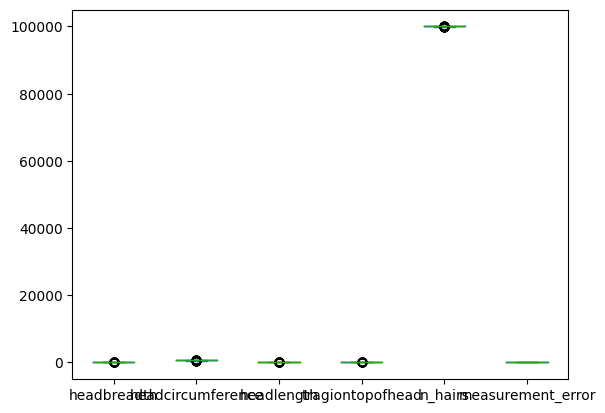

In [8]:
# Create the boxplot
head_df.plot(kind= 'box')

Normalize the data by dividing the DataFrame with its mean values.

headbreadth          1.678952e-03
headcircumference    1.029623e-03
headlength           1.867872e-03
tragiontopofhead     2.639840e-03
n_hairs              1.002552e-08
measurement_error    0.000000e+00
dtype: float64


<Axes: >

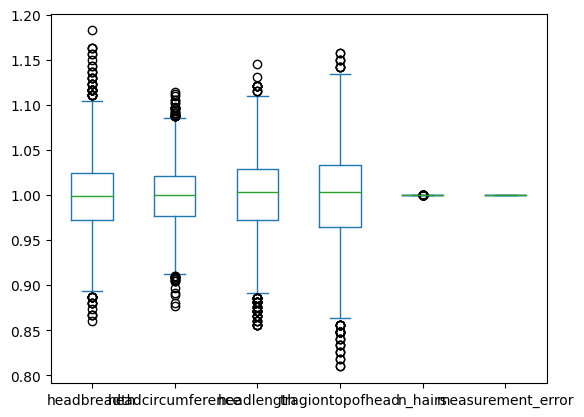

In [9]:
# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

# Display boxplot
normalized_df.plot(kind= 'box')

**Question**  
Inspect the printed variances. If you want to remove the 2 very low variance features. What would be a good variance threshold?  
  
- [ ] 1.5e-03
- [ ] 1.5e-02
- [x] 1.0e-03
- [ ] 1.0e-02
  
You're right! A threshold of 1.0e-03 (0.001) will remove the two low variance features.  

### Features with low variance
  
In the previous exercise you established that 0.001 is a good threshold to filter out low variance features in head_df after normalization. Now use the `VarianceThreshold()` feature selector to remove these features.  

In [10]:
# Show the df
normalized_df.head()

,headbreadth,headcircumference,headlength,tragiontopofhead,n_hairs,measurement_error
0,0.985657,1.022744,1.049228,1.080097,1.000161,1.0
1,0.959373,0.996430,1.023761,0.925797,0.999938,1.0
2,0.972515,1.005201,1.028854,0.964372,0.999946,1.0
3,1.038225,1.010464,1.013574,0.979802,0.999891,1.0
4,1.005370,0.992921,1.003388,0.941227,1.000085,1.0


In [11]:
from sklearn.feature_selection import VarianceThreshold


# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}".format(head_df.shape[1], reduced_df.shape[1]))



Dimensionality reduced from 6 to 4


Good job, you've successfully removed the 2 low-variance features.

In [12]:
# Display the df
reduced_df.head()

,headbreadth,headcircumference,headlength,tragiontopofhead
0,150,583,206,140
1,146,568,201,120
2,148,573,202,125
3,158,576,199,127
4,153,566,197,122


### Removing features with many missing values  
  
You'll apply feature selection on the Boston Public Schools dataset which has been pre-loaded as school_df. Calculate the missing value ratio per feature and then create a mask to remove features with many missing values.  

In [13]:
# Load school dataset
school_df = pd.read_csv('../_datasets/Public_Schools2.csv')
school_df.head()

,x,y,objectid_1,objectid,bldg_id,bldg_name,address,city,zipcode,csp_sch_id,...,sch_name,sch_label,sch_type,shared,complex,label,tlt,pl,point_x,point_y
0,-71.004121,42.388799,1,1,1,Guild Bldg,195 Leyden Street,East Boston,2128,4061,...,Guild Elementary,Guild,ES,NaN,NaN,52,3,Grace,790128.152748,2.967094e+06
1,-71.030480,42.378545,2,2,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,2128,4541,...,Kennedy Patrick Elem,PJ Kennedy,ES,NaN,NaN,72,3,Grace,783027.745829,2.963318e+06
2,-71.033891,42.375279,3,3,4,Otis Bldg,218 Marion Street,East Boston,2128,4322,...,Otis Elementary,Otis,ES,NaN,NaN,106,3,Grace,782112.823908,2.962122e+06
3,-71.038011,42.378089,4,4,6,Odonnell Bldg,33 Trenton Street,East Boston,2128,4543,...,O'Donnell Elementary,O'Donnell,ES,NaN,NaN,103,3,Grace,780994.000003,2.963140e+06
4,-71.034921,42.380957,5,5,7,East Boston High Bldg,86 White Street,East Boston,2128,1070,...,East Boston High,East Boston HS,HS,NaN,NaN,36,2,Joel,781823.000004,2.964190e+06


In [14]:
# Locate the feature with teh highest ratio of missing values
school_df.isna().sum() / len(school_df)

x             0.000000
y             0.000000
objectid_1    0.000000
objectid      0.000000
bldg_id       0.000000
bldg_name     0.000000
address       0.000000
city          0.000000
zipcode       0.000000
csp_sch_id    0.000000
sch_id        0.000000
sch_name      0.000000
sch_label     0.000000
sch_type      0.000000
shared        0.877863
complex       0.984733
label         0.000000
tlt           0.000000
pl            0.000000
point_x       0.000000
point_y       0.000000
dtype: float64

**Question**  
In what range lies highest ratio of missing values for a single feature in the dataset?  
  
- [x] Between 0.9 and 1.0
- [ ] Between 0.8 and 0.9
- [ ] Between 0.7 and 0.8
- [ ] Between 0.6 and 0.7
  
Correct answer.

### Removing features with many missing values
  
You'll apply feature selection on the Boston Public Schools dataset which has been pre-loaded as school_df. Calculate the missing value ratio per feature and then create a mask to remove features with many missing values.  

In [15]:
# Load school dataset
school_df = pd.read_csv('../_datasets/Public_Schools2.csv')
school_df.head()

,x,y,objectid_1,objectid,bldg_id,bldg_name,address,city,zipcode,csp_sch_id,...,sch_name,sch_label,sch_type,shared,complex,label,tlt,pl,point_x,point_y
0,-71.004121,42.388799,1,1,1,Guild Bldg,195 Leyden Street,East Boston,2128,4061,...,Guild Elementary,Guild,ES,NaN,NaN,52,3,Grace,790128.152748,2.967094e+06
1,-71.030480,42.378545,2,2,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,2128,4541,...,Kennedy Patrick Elem,PJ Kennedy,ES,NaN,NaN,72,3,Grace,783027.745829,2.963318e+06
2,-71.033891,42.375279,3,3,4,Otis Bldg,218 Marion Street,East Boston,2128,4322,...,Otis Elementary,Otis,ES,NaN,NaN,106,3,Grace,782112.823908,2.962122e+06
3,-71.038011,42.378089,4,4,6,Odonnell Bldg,33 Trenton Street,East Boston,2128,4543,...,O'Donnell Elementary,O'Donnell,ES,NaN,NaN,103,3,Grace,780994.000003,2.963140e+06
4,-71.034921,42.380957,5,5,7,East Boston High Bldg,86 White Street,East Boston,2128,1070,...,East Boston High,East Boston HS,HS,NaN,NaN,36,2,Joel,781823.000004,2.964190e+06


In [16]:
# Create a boolean mask on whether each feature less than 50% missing values
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]

# Display shapes
print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


The number of features went down from 21 to 19.

## Pairwise correlation
  
**Pairwise correlation**  
  
In the last two lessons, we focused on techniques to remove features based on their individual properties, such as the variance they show or the proportion of missing values they have. A next step is to look at how features relate to one another to decide if they are worth keeping. Remember the pairplot we made in the first chapter? It allowed us to visually identify strongly correlated features. However, if we want to quantify the correlation between features, this method would fall short.
  
**Correlation coefficient (r)**  
  
To solve this, we need to have a measure for the strength of the correlation, this is where the correlation coefficient r comes in. The value of r always lies between minus one and plus one. Minus one describes a perfectly negative correlation, zero describes no correlation at all and plus one stands for a perfect positive correlation. When the relation between two features shows more variance, as is usually the case in real-world data, the correlation coefficients will be a bit closer to zero.
  
![Alt text](../_images/correlation_coef.png)  
  
We can calculate correlation coefficients on pandas DataFrames with the `.corr()` method. If we call it on the dataset the pairplot was built on, we'd get a so-called correlation matrix. It shows the correlation coefficient for each pairwise combination of features in the dataset. In fact, it even shows every pairwise correlation coefficient twice, since the correlation of A to B equals that of B to A. Perfectly correlated features, such as weight in kilograms and weight in pounds get a correlation coefficient of one. Meaning that if you know one feature, you can perfectly predict the other for this dataset. By definition, the diagonal in our correlation matrix shows a series of ones, telling us that, not surprisingly, each feature is perfectly correlated to itself.  
  
**Visualizing the correlation matrix**  
  
We can visualize this simple correlation matrix using Seaborn's `heatmap()` function. We've passed a custom color palette and some styling arguments to this function to get a nice looking plot. We can improve this plot further by removing duplicate and unnecessary information like the correlation coefficients of one on the diagonal. To do so we'll create a boolean mask. We use NumPy's `ones_like()` function to create a matrix filled with True values with the same dimensions as our correlation matrix and then pass this to NumPy's `triu()`, for triangle upper, function to set all non-upper triangle values to False. When we pass this mask to the `heatmap()` function it will ignore the upper triangle, allowing us to focus on the interesting part of the plot. When we apply this method to a slightly larger subset of the ANSUR data we can instantly spot that chest height is not correlated to the hip breadth while sitting, and that the suprasternale height is very strongly correlated to the chest height.  

## Visualizing the correlation matrix  
  
Reading the correlation matrix of ansur_df in its raw, numeric format doesn't allow us to get a quick overview. Let's improve this by removing redundant values and visualizing the matrix using `seaborn`.
Create the correlation matrix and visualize it using Seaborn's `heatmap()` function.

In [17]:
ansur_df_sample = ansur_df[[
    'elbowrestheight',
    'wristcircumference',
    'anklecircumference',
    'buttockheight',
    'crotchheight'
]]

ansur_df_sample.columns = [
    'Elbow rest height',
    'Wrist circumference', 
    'Ankle circumference', 
    'Buttock height', 
    'Crotch height'
]

ansur_df_sample.head()

,Elbow rest height,Wrist circumference,Ankle circumference,Buttock height,Crotch height
0,247,175,222,882,877
1,232,167,220,870,851
2,237,180,230,901,854
3,272,176,230,821,769
4,188,188,247,1080,1014


<Axes: >

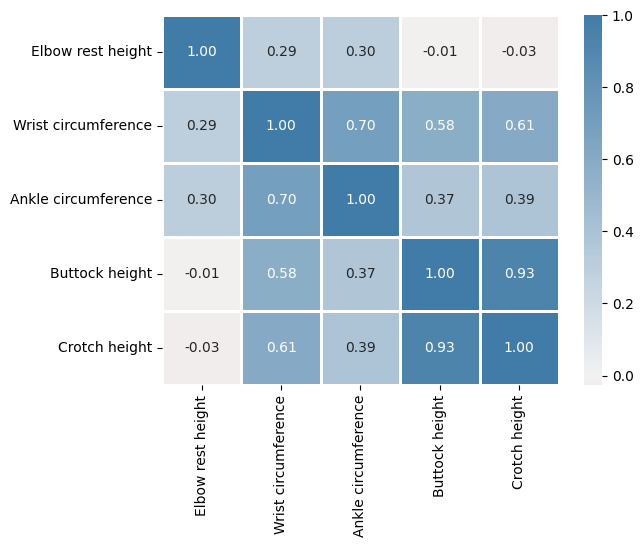

In [18]:
# Create the correlation matrix
corr = ansur_df_sample.corr()

cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr,  cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")

<Axes: >

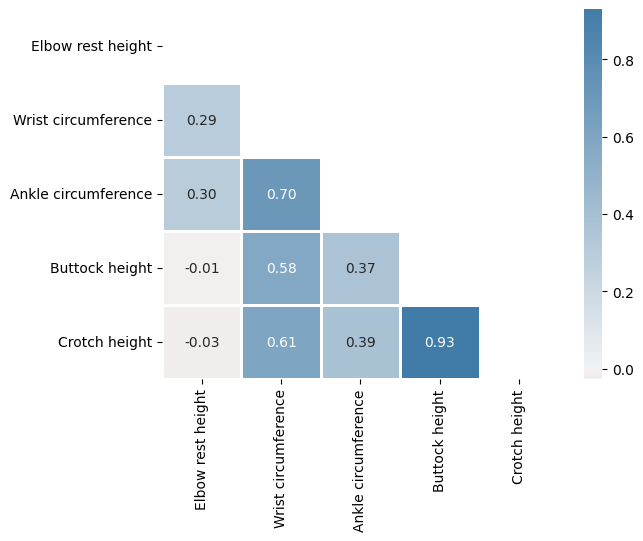

In [19]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt='.2f')

## Removing highly correlated features  
  
**Removing highly correlated features**  
  
Features that are perfectly correlated to each other, with a correlation coefficient of one or minus one, bring no new information to a dataset but do add to the complexity. So naturally, we would want to drop one of the two features that hold the same information. In addition to this we might want to drop features that have correlation coefficients close to one or minus one if they are measurements of the same or similar things.  
  
**Highly correlated data**  
  
For example, in the ANSUR dataset there are measurements for suprasternale, cervicale and chest height. The suprasternale and cervicale are two bones in the chest region so these three measurements always have very similar values. We get correlation coefficients as high as 98%. So for these features it too makes sense to keep only one. Not just for simplicity's sake but also to avoid models to overfit on the small, probably meaningless, differences between these values. If you are confident that dropping highly correlated features will not cause you to lose too much information, you can filter them out using a threshold value.  
  
**Removing highly correlated features**  
  
First create a correlation matrix and take the absolute values of that, to also filter out strong negative correlations. Then create a mask for the upper triangle of the dataset just like we did when we were visualizing the correlation matrix. When we pass this mask to the pandas DataFrame `.mask()` method it will replace all positions in the DataFrame where the mask has a True value with NA. So that our correlation matrix DataFrame looks like this.  
  
**Removing highly correlated features**  
  
We can then use a list comprehension to find all columns that have a correlation to any feature stronger than the threshold value. The reason we used the mask to set half of the matrix to NA values is that we want to avoid removing both features when they have a strong correlation. Finally we drop the selected features from the DataFrame with the `.drop()` method.  
  
**Feature extraction as an alternative**  
  
The method we just discussed is a bit of a brute force approach that should only be applied if you have a good understanding of the dataset. If you're unsure whether removing highly correlated features will remove important information from the data but still need to reduce dimensionality, you could consider feature extraction techniques. These remove correlated features for you, and we'll be looking into them in the final chapter.  
  
**Correlation caveats - Anscombe's quartet**  
  
What's important to know about correlation coefficients is that they can produce weird results when the relation between two features is non-linear or when outliers are involved. For example, the four datasets displayed here, known as Anscombe's quartet, all have the same correlation coefficient of 0.82. To avoid unpleasant surprises like this, make sure you visually check your data early on.  
  
**Correlation caveats - causation**  
  
![Alt text](../_images/correlation-caveats.png)  
  
A final thing to know about strong correlations is that they do not imply causation. In this example dataset, the number of firetrucks sent to a fire is correlated to the number of people wounded by that fire. Concluding that the higher number of wounded people is caused by sending more firetrucks would be wrong and even dangerous if used as a reason to send fewer trucks in the future.  

### Filtering out highly correlated features  
  
You're going to automate the removal of highly correlated features in the numeric ANSUR dataset. You'll calculate the correlation matrix and filter out columns that have a correlation coefficient of more than 0.95 or less than -0.95.  
  
Since each correlation coefficient occurs twice in the matrix (correlation of A to B equals correlation of B to A) you'll want to ignore half of the correlation matrix so that only one of the two correlated features is removed. Use a mask trick for this purpose.  

In [20]:
ansur_male = pd.read_csv('../_datasets/ANSUR_II_MALE.csv')
ansur_df = ansur_male

> FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning. corr_matrix = ansur_df.corr().abs()
  
In the `.corr()` method we specify two additional kwargs, one being the method and the second being the numberic_only which is a bool. In the to_drop list comprehension, we use the `.gt()` method instead of the > operator to compare the values of the lower triangle of tri_df with 0.95. The `.gt()` method explicitly compares values greater than 0.95.  
> Original method: `corr_matrix = ansur_df.corr().abs()`  
> `to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]`  
  
> Alternative method can be used: `.gt()`  
> Alternative: `corr_matrix = ansur_df.corr(method='pearson', numeric_only=True).abs()`  
> `to_drop = [c for c in tri_df.columns if any(tri_df[c].gt(0.95))]`  

In [21]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = ansur_df.corr(method='pearson', numeric_only=True).abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c].gt(0.95))]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The reduced dataframe has 88 columns.


You've automated the removal of highly correlated features.

### Nuclear energy and pool drownings
  
The dataset that has been pre-loaded for you as weird_df contains actual data provided by the US Centers for Disease Control & Prevention and Department of Energy.  
  
Let's see if we can find a pattern.  

In [22]:
# Load the data
weird_df = pd.read_csv('../_datasets/weird_df.csv')

In [23]:
# Print the first five lines of weird_df
print(weird_df.head())

   pool_drownings  nuclear_energy
0             421           728.3
1             465           753.9
2             494           768.8
3             538           780.1
4             430           763.7


<Axes: xlabel='nuclear_energy', ylabel='pool_drownings'>

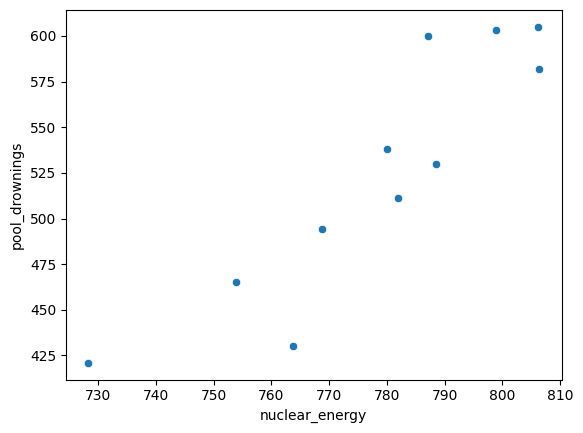

In [24]:
# Put nuclear energy production on the x-axis and the number of pool drownings on the y-axis
sns.scatterplot(x='nuclear_energy', y='pool_drownings', data=weird_df)

In [25]:
# Print out the correlation matrix of weird_df
print(weird_df.corr())

                pool_drownings  nuclear_energy
pool_drownings        1.000000        0.901179
nuclear_energy        0.901179        1.000000


Correlation of the data does not imply causation. While the example is silly, you'll be amazed how often people misunderstand correlation versus causation.  
**correlation != causation**  